In [164]:
import os
import re
import pandas as pd
import numpy as np

In [165]:
# Folder containing CSV files
folder_path = '../src/lap_times_fixed/'

# List all files in the folder ending with '.csv'
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize a dictionary to store dataframes
dataframes = {}

# Loop through each file and read its data into a pandas DataFrame
for file_path in file_paths:
    # Extract file name without extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    
    # Read CSV into a dataframe and store it in the dictionary
    dataframes[file_name] = pd.read_csv(file_path)

## Check dataframe content

In [166]:
dataframes['Dataframe_1'].head()

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4,Varv 5,Varv 6
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,14:08.2,14:17.5,11:47.5,12:52.1,NaN,NaN
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,14:38.8,14:31.4,12:13.6,12:21.2,NaN,NaN
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,14:20.4,14:53.3,12:03.4,12:34.3,NaN,NaN
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,14:26.6,14:50.0,12:07.0,12:42.5,NaN,NaN
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,14:40.2,15:07.9,11:56.7,12:28.9,NaN,NaN


In [167]:
# Concatenating DataFrames vertically
concatenated_df = pd.concat([dataframes['Dataframe_1'], dataframes['Dataframe_2'],
                             dataframes['Dataframe_3'], dataframes['Dataframe_4'],
                             dataframes['Dataframe_5'], dataframes['Dataframe_6']], axis=0)

# Outputting the resulting DataFrame
concatenated_df.head(-10)

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4,Varv 5,Varv 6,Varv 7,Varv 8,Varv 9,Varv 10,Varv 11
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,14:08.2,14:17.5,11:47.5,12:52.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,14:38.8,14:31.4,12:13.6,12:21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,14:20.4,14:53.3,12:03.4,12:34.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,14:26.6,14:50.0,12:07.0,12:42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,14:40.2,15:07.9,11:56.7,12:28.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Tibro MK,2023,47.0,Bredd,213,Björn Levin,Kinna MK,4,13:56.1,18:39.1,18:19.7,18:30.7,18:26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,Tibro MK,2023,48.0,Bredd,332,Ulf Åström,Wäxjö MS,4,16:18.5,19:03.6,19:05.7,19:10.9,18:58.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,Tibro MK,2023,49.0,Dam,441,Hilda Sjöberg,Tibro MK,4,17:31.0,19:31.1,19:36.3,19:18.4,19:05.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Tibro MK,2023,50.0,Bredd,315,Jesper Thorsson,Kungsbacka MA,4,17:53.0,19:36.0,19:27.1,19:18.8,19:30.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean data by dropping Columns not needed.

In [168]:
# Dropping columns Varv 5 to Varv 11
columns_to_drop = ['Varv 5', 'Varv 6', 'Varv 7', 'Varv 8', 'Varv 9', 'Varv 10', 'Varv 11']
concatenated_df.drop(columns=columns_to_drop, inplace=True)

concatenated_df.head(-10)

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,14:08.2,14:17.5,11:47.5,12:52.1
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,14:38.8,14:31.4,12:13.6,12:21.2
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,14:20.4,14:53.3,12:03.4,12:34.3
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,14:26.6,14:50.0,12:07.0,12:42.5
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,14:40.2,15:07.9,11:56.7,12:28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Tibro MK,2023,47.0,Bredd,213,Björn Levin,Kinna MK,4,13:56.1,18:39.1,18:19.7,18:30.7,18:26.4
321,Tibro MK,2023,48.0,Bredd,332,Ulf Åström,Wäxjö MS,4,16:18.5,19:03.6,19:05.7,19:10.9,18:58.2
322,Tibro MK,2023,49.0,Dam,441,Hilda Sjöberg,Tibro MK,4,17:31.0,19:31.1,19:36.3,19:18.4,19:05.1
323,Tibro MK,2023,50.0,Bredd,315,Jesper Thorsson,Kungsbacka MA,4,17:53.0,19:36.0,19:27.1,19:18.8,19:30.9


## Clean data by dropping rows that has NaN, NaT or 'KÖR' values

In [169]:
# Dropping rows with NaN, NaT values, or 'KÖR' in columns 'Varv 1' to 'Varv 4'
columns_to_check = ['Varv 1', 'Varv 2', 'Varv 3', 'Varv 4']
concatenated_df = concatenated_df.dropna(subset=columns_to_check, how='any')

# Filter out rows containing 'KÖR' in any of the specified columns
for col in columns_to_check:
    concatenated_df = concatenated_df[~concatenated_df[col].str.contains('KÖR')]

# Outputting the resulting DataFrame
concatenated_df.head()

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,14:08.2,14:17.5,11:47.5,12:52.1
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,14:38.8,14:31.4,12:13.6,12:21.2
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,14:20.4,14:53.3,12:03.4,12:34.3
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,14:26.6,14:50.0,12:07.0,12:42.5
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,14:40.2,15:07.9,11:56.7,12:28.9


## Convert lap times to time seconds format.

In [170]:
# Function to convert lap time strings to seconds
def convert_to_seconds(lap_time):
    if pd.notnull(lap_time) and isinstance(lap_time, str) and ':' in lap_time:
        minutes, rest = lap_time.split(':')
        seconds_tenths = rest.split('.')
        if len(seconds_tenths) == 2:
            seconds, tenths = map(int, seconds_tenths)
            total_seconds = int(minutes) * 60 + seconds + tenths / 10
            return total_seconds
    return pd.NaT if pd.isnull(lap_time) else lap_time

# Apply the conversion function to lap time columns
for col in varv_columns:
    concatenated_df[col] = concatenated_df[col].apply(convert_to_seconds)



In [171]:
concatenated_df.head(-10)

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,848.2,857.5,707.5,772.1
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,878.8,871.4,733.6,741.2
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,860.4,893.3,723.4,754.3
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,866.6,890.0,727.0,762.5
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,880.2,907.9,716.7,748.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Tibro MK,2023,46.0,Bredd,369,Andreas Axelsson,Tibro MK,4,13:09.7,1084.5,1104.5,1091.0,1109.6
320,Tibro MK,2023,47.0,Bredd,213,Björn Levin,Kinna MK,4,13:56.1,1119.1,1099.7,1110.7,1106.4
321,Tibro MK,2023,48.0,Bredd,332,Ulf Åström,Wäxjö MS,4,16:18.5,1143.6,1145.7,1150.9,1138.2
322,Tibro MK,2023,49.0,Dam,441,Hilda Sjöberg,Tibro MK,4,17:31.0,1171.1,1176.3,1158.4,1145.1


In [172]:
# Convert 'Plac' column to numeric
concatenated_df['Plac'] = pd.to_numeric(concatenated_df['Plac'])

In [173]:
concatenated_df.head(-10)

,Plats,År,Plac,Klass,#,Namn,Klubb,Varv,Tid,Varv 1,Varv 2,Varv 3,Varv 4
0,FMCK Skövde,2023,1.0,Motion 40-49,1111,Magnus Edberg,Huskvarna MK,4,53:05.5,848.2,857.5,707.5,772.1
1,FMCK Skövde,2023,2.0,Motion -39,518,Alexander Fält,Försvarsmaktens EK,4,53:45.2,878.8,871.4,733.6,741.2
2,FMCK Skövde,2023,3.0,Motion -39,577,Måns Dalén,FMCK Skövde,4,53:51.5,860.4,893.3,723.4,754.3
3,FMCK Skövde,2023,4.0,Ungdom E1,175,William Almén,SMK Värnamo,4,54:06.2,866.6,890.0,727.0,762.5
4,FMCK Skövde,2023,5.0,Motion 40-49,944,Niklas Strömberg,Götene MK,4,54:13.8,880.2,907.9,716.7,748.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Tibro MK,2023,46.0,Bredd,369,Andreas Axelsson,Tibro MK,4,13:09.7,1084.5,1104.5,1091.0,1109.6
320,Tibro MK,2023,47.0,Bredd,213,Björn Levin,Kinna MK,4,13:56.1,1119.1,1099.7,1110.7,1106.4
321,Tibro MK,2023,48.0,Bredd,332,Ulf Åström,Wäxjö MS,4,16:18.5,1143.6,1145.7,1150.9,1138.2
322,Tibro MK,2023,49.0,Dam,441,Hilda Sjöberg,Tibro MK,4,17:31.0,1171.1,1176.3,1158.4,1145.1


## Test MSE to train a linear regression model

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [175]:
# Select relevant features (Varv 1 to Varv 4) and the target variable (Plac)
features = concatenated_df[['Varv 1', 'Varv 2', 'Varv 3', 'Varv 4']]
target = concatenated_df['Plac']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Rank riders based on predictions
ranked_df = concatenated_df.copy()
ranked_df['Predicted_Plac'] = model.predict(features)
ranked_df = ranked_df.sort_values(by='Predicted_Plac')


Mean Squared Error: 1357.7182589411798


## Scatter plot of predicted versus actual placements

In [176]:
import matplotlib.pyplot as plt

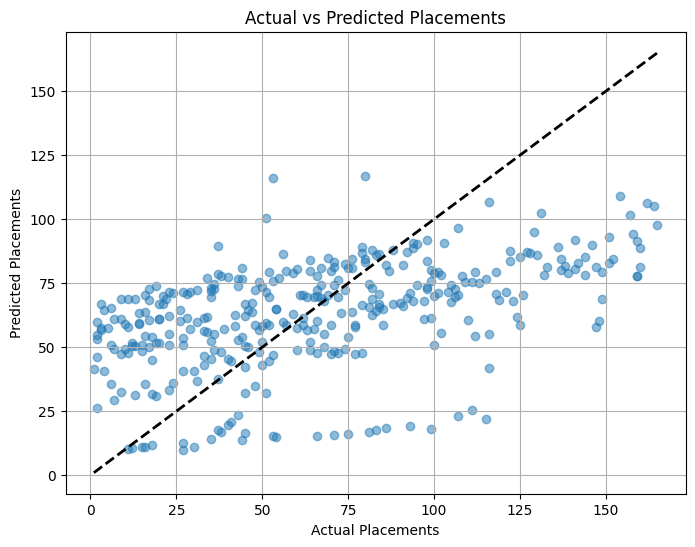

In [177]:
# Plotting actual placements against predicted placements
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Placements')
plt.ylabel('Predicted Placements')
plt.title('Actual vs Predicted Placements')

# Adding a diagonal line for reference (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

##  Calculating the Root Mean Squared Error (RMSE)
It's similar to Mean Squared Error (MSE), but the RMSE provides an interpretable error metric in the same units as the target variable, which might be more intuitive to understand.

In [178]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 36.847228646686304


## Scatter plot
Where the x-axis represents the actual placements and the y-axis represents the predicted placements. This visualization will show how closely your predictions align with the actual values for each data point.

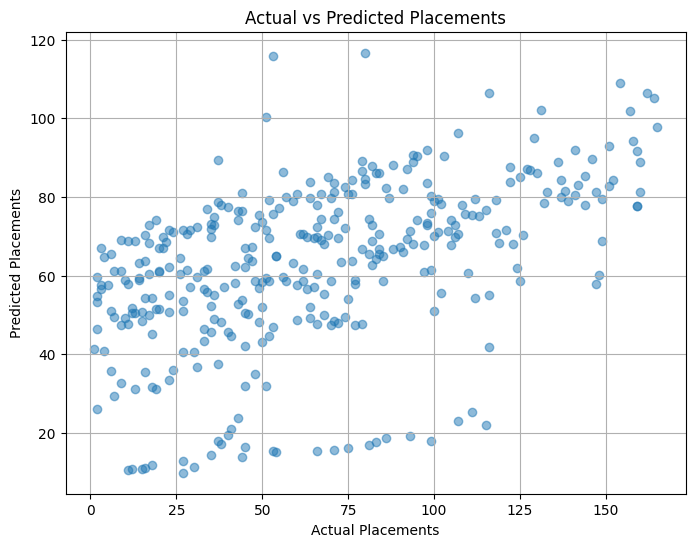

In [179]:
# Plotting actual versus predicted placements
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Placements')
plt.ylabel('Predicted Placements')
plt.title('Actual vs Predicted Placements')
plt.grid(True)
plt.show()

## Calculate the rank
Based on the three best lap times for each rider on each "Plats" and then get an average rank across all "Plats"

In [180]:
# Combine 'Namn' and 'Klubb' to create a unique identifier for each rider
concatenated_df['Unique_Rider'] = concatenated_df['Namn'] + '_' + concatenated_df['Klubb']

# Sort the lap times for each rider within each "Plats"
concatenated_df['Top_3_Lap_Times'] = concatenated_df[['Varv 1', 'Varv 2', 'Varv 3', 'Varv 4']].apply(lambda x: sorted(x)[:3], axis=1)

# Calculate rank based on the top 3 lap times for each "Plats"
concatenated_df['Rank_Per_Plats'] = concatenated_df.groupby('Unique_Rider')['Top_3_Lap_Times'].rank(method='min')

# Calculate the average rank across all "Plats" for each rider
average_rank_df = concatenated_df.groupby(['Namn', 'Klubb'])['Rank_Per_Plats'].mean().reset_index().sort_values(by='Rank_Per_Plats')

# View the average rank for each rider
average_rank_df.head(-10)

,Namn,Klubb,Rank_Per_Plats
356,Krister Thorell,SMK Gävle,1.0
556,Philip Andersson,Haninge MK,1.0
279,Joakim Bröms,Mälarö MCK,1.0
558,Philip Johansson,Skene MS,1.0
559,Philip Landh,SMK Trollhättan,1.0
...,...,...,...
602,Roger Wallgren,FMCK Skövde,3.5
599,Roger Jakobsson,Kullings MS,3.5
94,Carl Nydén,SMK Värnamo,3.5
587,Robert Friberg,FMCK Skövde,3.5


## Load participants for new event

In [181]:
file_path = '../src/unseeded/unseeded.csv'

# Read the CSV file into a DataFrame with the second row as column names
new_event_df = pd.read_csv(file_path, encoding='cp1252', header=0)

# Display the first few rows of the DataFrame
new_event_df.head(-10)

,Tidaholms MK,2024,#,Namn,Klubb,Märke,Klass
0,NaN,NaN,200,Andreas Toresson,Lilla Edets MCK,KTM,Bredd
1,NaN,NaN,213,Björn Levin,Kinna MK,Husqvarna,Bredd
2,NaN,NaN,241,Joakim Svensson,Linköpings MS,KTM,Bredd
3,NaN,NaN,106,Wilmer Jansson,Tidaholms MK,Husqvarna,Junior
4,NaN,NaN,119,Hugo Andersson,Tibro MK,Sherco,Junior
...,...,...,...,...,...,...,...
168,NaN,NaN,102,Liam Qvist,Åbågen MCK,Honda,Ungdom E1
169,NaN,NaN,103,Anton Magnusson,Norrahammars MK,KTM,Ungdom E1
170,NaN,NaN,104,Lisa Nyqvist,Stenungsunds MS,KTM,Ungdom E1
171,NaN,NaN,106,Hampus Andersson,Tibro MK,Sherco,Ungdom E1


## Merge new event details with historical rankings to create seeded list.

In [182]:
# Merge new_event_df with average_rank_df on 'Namn' and 'Klubb' columns
new_event_df = new_event_df.merge(average_rank_df, how='left', on=['Namn', 'Klubb'])

# Rename the column to 'Seedning' for clarity
new_event_df.rename(columns={'Rank_Per_Plats': 'Seedning'}, inplace=True)

# Sort the DataFrame based on the 'Seedning' column in ascending order
new_event_df = new_event_df.sort_values(by='Seedning')

# View the new_event_df with the added 'Seedning' column
new_event_df.head(-10)


,Tidaholms MK,2024,#,Namn,Klubb,Märke,Klass,Seedning
88,NaN,NaN,1219,Conny Ståhl,Hjo MK,Kawasaki,Motion 50-59,1.0
87,NaN,NaN,1218,Sören Fransson,Kinds MK,KTM,Motion 50-59,1.0
89,NaN,NaN,1220,Roger Nyström,FMCK Borås,Beta,Motion 50-59,1.0
90,NaN,NaN,1222,Jonas Laigar,Tranemo MK,Kawasaki,Motion 50-59,1.0
25,NaN,NaN,547,Felix Johansson,Kinds MK,Honda,Motion -39,1.0
...,...,...,...,...,...,...,...,...
151,NaN,NaN,2,Adrian Gran,FMCK Skövde,KTM,Ungdom E0,NaN
152,NaN,NaN,5,Albin Ekström,Tibro MK,GasGas,Ungdom E0,NaN
153,NaN,NaN,6,Olle Persson,Örebro MK,KTM,Ungdom E0,NaN
154,NaN,NaN,7,Hector Hjalmarsson,Tibro MK,Yamaha,Ungdom E0,NaN


## Save to a CSV file

In [184]:
new_event_df.to_csv('../src/seeded/predicted_placements_new_event.csv', index=False)